In [16]:
from google.colab import files

# Upload files using Google Colab's upload interface
uploaded = files.upload()


Saving Animals.zip to Animals.zip


In [6]:
import os
import cv2
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tqdm import tqdm


In [17]:
import zipfile
import os

zip_file_name = 'Animals.zip'
data_set = '/content/Animals'

# Create directory for the dataset if not already present
os.makedirs(data_set, exist_ok=True)

# Extract contents of the ZIP file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(data_set)

print(f"Files extracted to {data_set}")

# List the categories (subdirectories) in the dataset
categories = os.listdir(data_set)
print(f"Categories found: {categories}")


Files extracted to /content/Animals
Categories found: ['Leopard', 'Jaguar', 'Cheetah', 'Tiger', 'Lion']


In [18]:
train_data = []

# Iterate over each category folder and load images
for c in categories:
    path = os.path.join(data_set, c)
    class_index = categories.index(c)
    print(f"Processing category: {c} (Index: {class_index})")

    for img in tqdm(os.listdir(path), desc=f"Processing images in {c}", leave=True):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            if img_array is None:
                raise ValueError(f"Image {img} could not be read or is corrupted.")

            # Resize image to a consistent size
            img_array = cv2.resize(img_array, (256, 256))
            train_data.append([img_array, class_index])

        except Exception as e:
            print(f"Skipping corrupted image {img} in {c}: {e}")

print(f"\nTotal images processed: {len(train_data)}")


Processing category: Leopard (Index: 0)


Processing images in Leopard: 100%|██████████| 31/31 [00:00<00:00, 273.83it/s]


Processing category: Jaguar (Index: 1)


Processing images in Jaguar: 100%|██████████| 30/30 [00:00<00:00, 359.45it/s]


Processing category: Cheetah (Index: 2)


Processing images in Cheetah: 100%|██████████| 38/38 [00:00<00:00, 327.17it/s]


Processing category: Tiger (Index: 3)


Processing images in Tiger: 100%|██████████| 39/39 [00:00<00:00, 318.86it/s]


Processing category: Lion (Index: 4)


Processing images in Lion: 100%|██████████| 32/32 [00:00<00:00, 431.79it/s]


Total images processed: 170


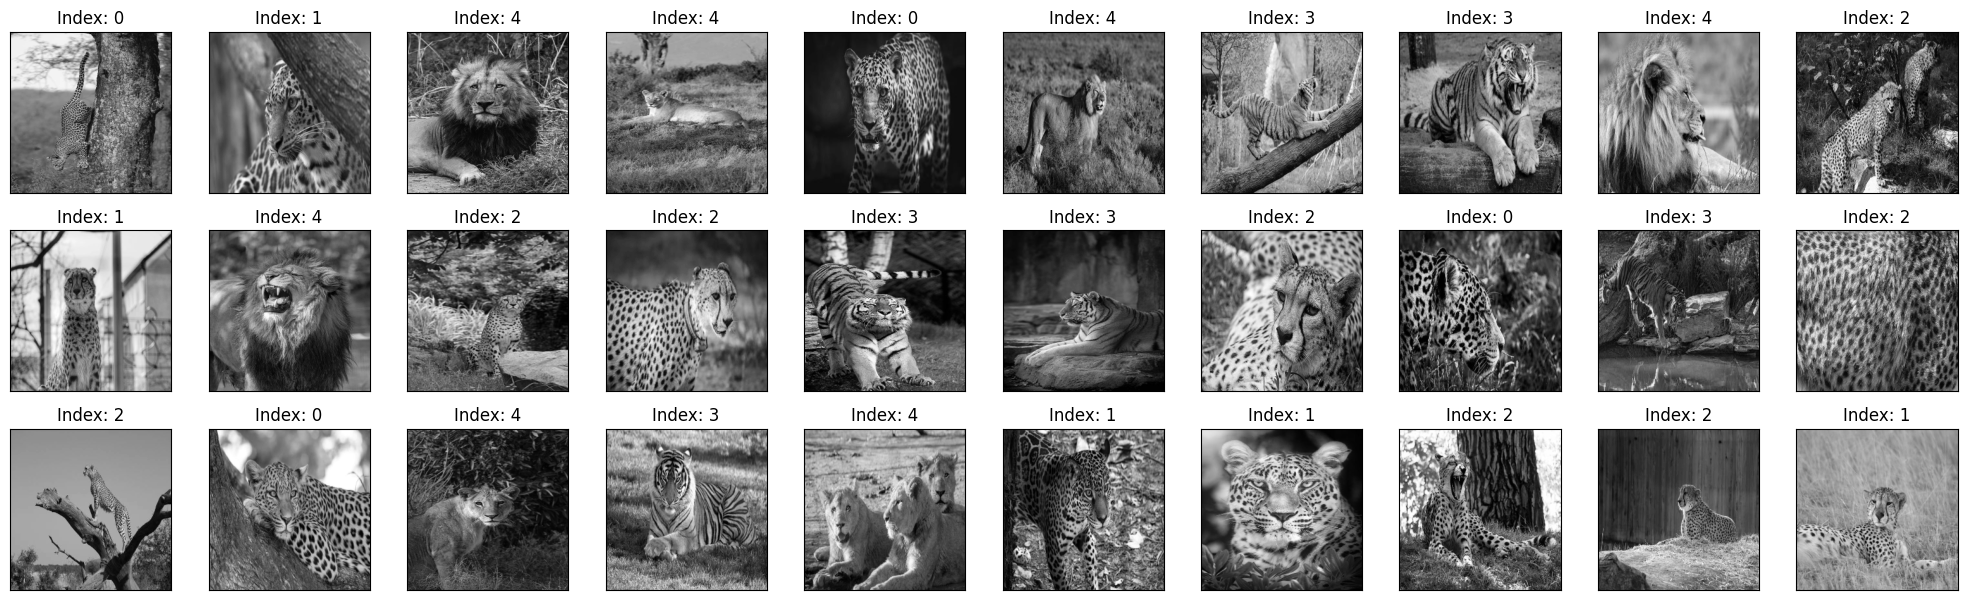

In [19]:
import matplotlib.pyplot as plt

# Shuffle the training data
random.shuffle(train_data)

plt.figure(figsize=(20, 20))
i = 20  # Starting index for image display

# Display a grid of 100 images (10x10)
for n in range(10):
    for e in range(10):
        img_index = i + n * 50 + e
        if img_index < len(train_data):
            plt.subplot(10, 10, n * 10 + e + 1)
            plt.imshow(train_data[img_index][0], cmap="gray")
            plt.xticks([])
            plt.yticks([])
            plt.title(f"Index: {train_data[img_index][1]}")

plt.tight_layout()
plt.show()


In [20]:
import numpy as np
import random

# Shuffle the data again for cross-validation
random.shuffle(train_data)

num_folds = 5
fold_size = len(train_data) // num_folds

# Split data into folds
folds = [train_data[i * fold_size: (i + 1) * fold_size] for i in range(num_folds)]

def euclidean_distance(img1, img2):
    try:
        return np.sqrt(np.sum((img1.flatten() - img2.flatten()) ** 2))
    except Exception as e:
        print(f"Error calculating distance: {e}")
        return float('inf')

# Dictionary to store accuracies for each value of k
accuracies = {k: [] for k in range(1, 31)}

for k in range(1, 31):
    print(f"Validation accuracy for k={k}:")

    for fold_num in range(num_folds):
        validation_fold = folds[fold_num]
        training_folds = [folds[i] for i in range(num_folds) if i != fold_num]
        training_data = [item for sublist in training_folds for item in sublist]

        correct_predictions = 0
        total_predictions = len(validation_fold)

        for val_img, val_label in validation_fold:
            distances = []
            for train_img, train_label in training_data:
                try:
                    distance = euclidean_distance(val_img, train_img)
                    distances.append((distance, train_label))
                except Exception as e:
                    print(f"Skipped a corrupted training image: {e}")

            if distances:
                distances.sort(key=lambda x: x[0])
                nearest_neighbors = [label for _, label in distances[:k]]
                predicted_label = max(set(nearest_neighbors), key=nearest_neighbors.count)

                if predicted_label == val_label:
                    correct_predictions += 1

        accuracy = correct_predictions / total_predictions * 100
        accuracies[k].append(accuracy)

        print(f"Fold {fold_num + 1} validation accuracy = {accuracy:.3f}%")

    print("-" * 40)

# Compute average accuracy for each value of k
average_points = [np.mean(accuracies[k]) for k in range(1, 31)]


Validation accuracy for k=1:
Fold 1 validation accuracy = 38.235%
Fold 2 validation accuracy = 38.235%
Fold 3 validation accuracy = 32.353%
Fold 4 validation accuracy = 35.294%
Fold 5 validation accuracy = 14.706%
----------------------------------------
Validation accuracy for k=2:
Fold 1 validation accuracy = 17.647%
Fold 2 validation accuracy = 32.353%
Fold 3 validation accuracy = 38.235%
Fold 4 validation accuracy = 35.294%
Fold 5 validation accuracy = 26.471%
----------------------------------------
Validation accuracy for k=3:
Fold 1 validation accuracy = 29.412%
Fold 2 validation accuracy = 32.353%
Fold 3 validation accuracy = 35.294%
Fold 4 validation accuracy = 29.412%
Fold 5 validation accuracy = 23.529%
----------------------------------------
Validation accuracy for k=4:
Fold 1 validation accuracy = 29.412%
Fold 2 validation accuracy = 38.235%
Fold 3 validation accuracy = 44.118%
Fold 4 validation accuracy = 35.294%
Fold 5 validation accuracy = 20.588%
---------------------

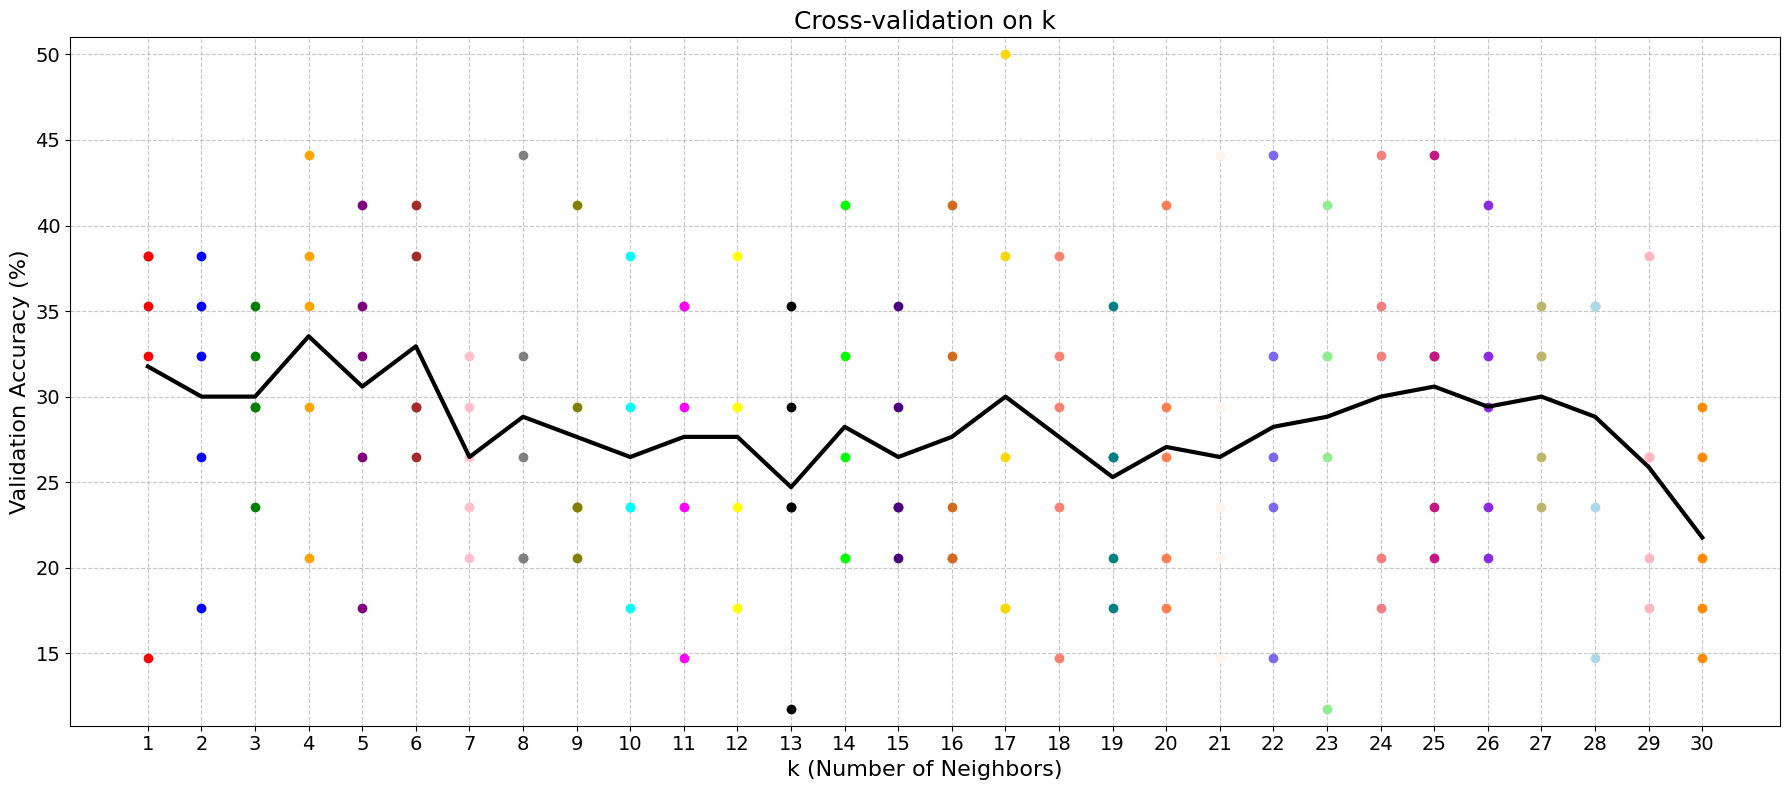

In [21]:
import matplotlib.pyplot as plt

num_folds = 5

# Define colors explicitly for each k
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
          'magenta', 'yellow', 'black', 'lime', 'indigo', 'chocolate', 'gold', 'salmon', 'teal',
          'coral', 'seashell', 'mediumslateblue', 'lightgreen', 'lightcoral', 'mediumvioletred',
          'blueviolet', 'darkkhaki', 'lightblue', 'lightpink', 'darkorange', 'forestgreen']

plt.figure(figsize=(18, 8))

# Plotting points for each k
for k in range(1, 31):
    plt.plot([k] * num_folds, accuracies[k], marker='o', markersize=6, linestyle='', color=colors[k - 1])

# Plot average accuracy line
plt.plot(range(1, 31), average_points, color='black', linestyle='-', linewidth=3)

min_accuracy = min(min(accuracies[k]) for k in accuracies) - 1
max_accuracy = max(max(accuracies[k]) for k in accuracies) + 1
plt.ylim(min_accuracy, max_accuracy)

plt.title('Cross-validation on k', fontsize=18)
plt.xlabel('k (Number of Neighbors)', fontsize=16)
plt.ylabel('Validation Accuracy (%)', fontsize=16)

plt.xticks(range(1, 31), fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
